In [1]:
import os
import glob
import time
import numpy as np 
import cv2
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from PIL import Image

In [2]:
def get_closest(y, y_space):
    _min = None
    min_index = None
    for index, y_ in enumerate(y_space):
        if index == 0:
            _min = np.abs(y_ - y)
            min_index = index
        else:
            tmp = np.abs(y_ - y)
            if _min > tmp:
                _min = tmp
                min_index = index
    
    return min_index

In [3]:
def make_img(min_x, max_x, min_y, max_y, x_pixels, function):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space)), dtype=np.float32)
    
    for index, x in enumerate(x_space):
        y = function(x)
        img[len(y_space) - (1 + get_closest(y, y_space))][index] = 255
    
    return img

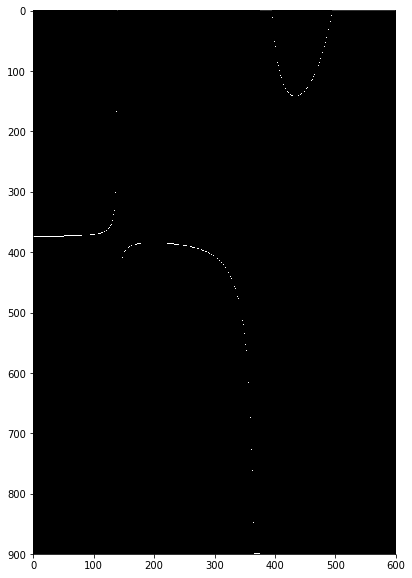

In [4]:
img = make_img(-5, 3, -7, 5, 600, lambda x: np.exp(x)/np.sin(x))
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")

In [48]:
save_img(img, "tanh")

## Making animations
___

In [5]:
import moviepy.editor as mvpy

In [6]:
def FunctionList(min_x, max_x, min_y, max_y, x_pixels, function, mod=1, width=1):
    dx = max_x - min_x
    dy = max_y - min_y
    
    ratio = float(dx)/dy
    
    # init x space and y space
    x_space = np.linspace(min_x, max_x, x_pixels)
    y_space = np.linspace(min_y, max_y, int(x_pixels / ratio))
    
    # init img
    img = np.zeros((len(y_space), len(x_space)), dtype=np.float32)
    
    order = [] # list to keep track of order of images in the video we will create
    for index, x in enumerate(x_space):
        if (index % mod) == 0: # take img every mod pixels
            y = function(x) 
            img[len(y_space) - (1 + get_closest(y, y_space))][index] = 255 # light up image at correct spot
            cv2.imwrite("./data/img-{}.jpg".format(index), np.dstack([img, img, img])) # write image to folder
            order.append("./data/img-{}.jpg".format(index)) # add image name to order list
    
    return order

def makeAnimation(min_x, max_x, min_y, max_y, x_pixels, function, fps, fname, mod):
    d = []
    order = FunctionList(min_x, max_x, min_y, max_y, x_pixels, function, mod)
        
    clip = mvpy.ImageSequenceClip(order, fps=fps) # make clip object
    clip.write_videofile(fname, fps=fps) # write it to disk

In [16]:
order = []
i = 0
while (i < 1000):
    order.append("./data/img-{}.jpg".format(i))
    i += 3

In [12]:
makeAnimation(-5, 5, -1.2, 1.2, 2500, lambda x: np.sin((x**2)-1)*np.cos(1.4+2*x)*np.sin(2.2+0.3*x), 150, "wave.mp4", 3)

Moviepy - Building video wave.mp4.
Moviepy - Writing video wave.mp4



Moviepy - Done !
Moviepy - video ready wave.mp4


In [14]:
for path in glob.glob("./data/*"):
    os.unlink(path)

In [22]:
clip = mvpy.ImageSequenceClip(order, fps=70, load_images=True) # make clip object

In [23]:
clip.write_videofile("cossin.mp4", 100, audio=False)

[MoviePy] >>>> Building video cossin.mp4
[MoviePy] Writing video cossin.mp4


100%|███████████████████████████████████████████████████████████████████████████████| 478/478 [00:01<00:00, 457.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: cossin.mp4 

